<a href="https://colab.research.google.com/github/aniketsaini08/Linearmodels/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR MODELS

In [ ]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.DataFrame(df.data,columns=df.feature_names)
dataset['Price'] = df.target


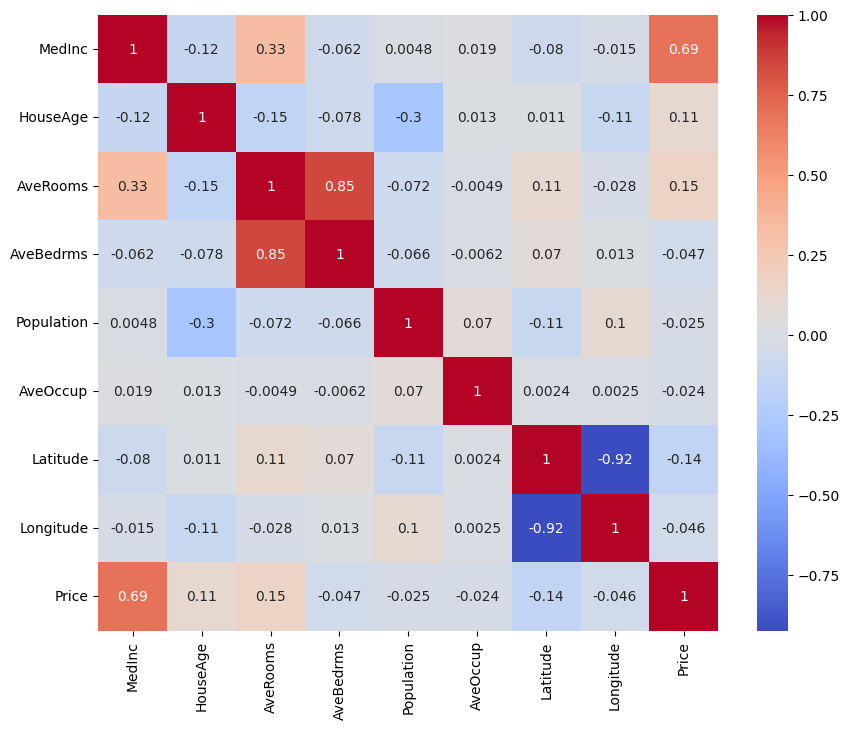

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:

dataset.drop(['Latitude'], axis=1, inplace=True)


In [ ]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [ ]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x[:5])

[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293 ]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576]]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
lasso = Lasso()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,0.003,0.002,0.001, 1, 5, 10, 20, 30, 35]}
lasso_reg = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.854e+01, tolerance: 1.463e+00
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.002}
-0.6171802172500017


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linear = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5319986931105576


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
ridge = Ridge()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
params = {'alpha': [1e-15, 1e-10,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,9]}
ridge_reg = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x_train, y_train)
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 80}
-0.6172228305945645


In [ ]:
lasso_regg=lasso_reg.best_estimator_
y_pred  = lasso_regg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5328957573979762


In [ ]:
ridge_regg=ridge_reg.best_estimator_
y_pred  = ridge_regg.predict(x_test)
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.5331672295796867


In [242]:
import os
for file in os.listdir('/content'):
    if file.endswith('.ipynb'):
        print(file)


In [240]:
!cp "/content/linear.ipynb" "/content/Linear-models/"

cp: cannot stat '/content/linear.ipynb': No such file or directory
